# AIVLE스쿨 1차 미니프로젝트: 서울시 생활정보 기반 대중교통 수요 분석

<img src = "https://github.com/Jangrae/img/blob/master/bus.png?raw=true" width=800, align="left"/>

- 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.
- 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다.

### 로컬 수행(Anaconda)
- project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [2]:
# 기본 경로
path = ''

### 구글 콜랩 수행

- 구글 콜랩을 사용중이면 구글 드라이브를 연결합니다.

In [5]:
# 구글 드라이브 연결, 패스 지정
import sys
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    path = '/content/drive/MyDrive/project/'

### 한글 폰트 표시를 위해 설치합니다.

In [8]:
# 한글 표시를 위한 라이브러리 설치
!pip install koreanize_matplotlib -q

### 필요한 라이브러리를 불러옵니다.

In [10]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import scipy.stats as spst
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

- 제공 데이터
    - 버스 승하차 및 운행 노선 데이터
    - 구별 유동인구 데이터
    - 구별 주민 등록 데이터
    - 구별 업종 등록 정보
    
#### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다.

# 1. 데이터 불러오기

- 이전 과정에서 저장한 다음 4개의 파일을 불러와 데이터프레임으로 선언합니다.
    - 구별 버스 정류장 데이터(df_seoul_bus_station.csv) → df_seoul_bus_station
    - 구별 유동인구 데이터(df_seoul_moving.csv) → df_seoul_moving
    - 구별 상권 데이터(df_seoul_business.csv) → df_seoul_business
    - 구별 인구 데이터(df_seoul_people.csv) → df_seoul_people

In [20]:
# 구별 버스 정류장 데이터불러오기
df_seoul_bus_station = pd.read_csv(path + 'df_seoul_bus_station.csv')

# 확인
df_seoul_bus_station.head()

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,502,99,9113021,8640353,135.163908,128.153318
1,강동구,376,24,3306588,3242901,94.638885,92.816079
2,강북구,410,71,5244436,5077041,138.244306,133.831743
3,강서구,565,54,5244615,5218001,93.106837,92.634362
4,관악구,465,82,7691243,7850254,147.777793,150.832994


In [42]:
# 구별 유동인구 데이터 불러오기
df_seoul_moving = pd.read_csv(path + 'df_seoul_moving.csv')
df_seoul_moving.rename(columns={'도착 자치구':'자치구'},inplace=True)
# 확인
df_seoul_moving.head()

,자치구,평균 이동 시간(분),이동인구(합),총 이동시간,총 이동인구
0,강남구,65.220874,89.880083,37563832,51766253.76
1,강동구,71.135695,67.088111,27212889,25664489.79
2,강북구,65.258796,38.290780,24201877,14200518.80
3,강서구,70.107829,59.547527,30772920,26137612.75
4,관악구,63.064536,47.985346,27629141,21022812.01


In [44]:
#  구별 상권 데이터 불러오기
df_seoul_business = pd.read_csv(path + 'df_seoul_business.csv')

# 확인
df_seoul_business.head()

,자치구,택시운송업,한식 일반 음식점업,커피전문점,남녀용 겉옷 및 셔츠 도매업,일반 교과 학원,한식 육류요리 전문점
0,종로구,215,5912,3613,962,382,1982
1,중구,235,6414,3542,24248,175,2121
2,용산구,523,2987,2076,317,573,1184
3,성동구,2527,2785,1859,1572,1494,1545
4,광진구,1744,2861,1887,687,1646,1678


In [46]:
# 구별 인구 데이터 불러오기
df_seoul_people = pd.read_csv(path + 'df_seoul_people.csv')

# 확인
df_seoul_people.head()

,자치구,남자,여자,합계
0,종로구,71654,78390,150044
1,중구,63365,68392,131757
2,용산구,105480,113343,218823
3,성동구,136779,146555,283334
4,광진구,166541,183141,349682


# 2. 데이터 합치기

- 위에서 선언한 네 개의 데이터프레임을 '자치구'열을 기준으로 조인(merge)합니다.
- 조인 결과를 df 데이터프레임으로 선언합니다.

In [49]:
# 네 개의 데이터프레임 조인(megre)
df = pd.merge(df_seoul_bus_station, df_seoul_moving, how='inner', on='자치구')
df = pd.merge(df, df_seoul_business, how='inner', on='자치구')
df = pd.merge(df, df_seoul_people, how='inner', on='자치구')

In [55]:
# 확인
df.head(25)

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동시간,총 이동인구,택시운송업,한식 일반 음식점업,커피전문점,남녀용 겉옷 및 셔츠 도매업,일반 교과 학원,한식 육류요리 전문점,남자,여자,합계
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,51766253.76,2517,11486,7273,8320,9020,5008,268993,293762,562755
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,25664489.79,4980,3388,1660,1433,2104,1459,228197,239705,467902
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,14200518.80,2589,2663,1095,94,740,1176,139260,150567,289827
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,26137612.75,6922,4584,2530,700,2347,2274,270025,294460,564485
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,21022812.01,2027,3689,2049,190,1230,1628,248571,248566,497137
5,광진구,278,43,3207725,3228754,118.756247,119.534782,60.205262,44.344913,26680865,19652113.55,1744,2861,1887,687,1646,1678,166541,183141,349682
6,구로구,478,81,5525646,5324566,125.119353,120.566221,63.983186,43.321989,26223125,17755257.26,3817,3215,1384,923,1111,1496,203142,209735,412877
7,금천구,344,56,3990114,3839246,129.954208,125.040581,65.848807,30.799340,19914918,9314767.58,2598,2619,1215,2575,487,1042,121008,119081,240089
8,노원구,495,61,4609496,4535591,88.736303,87.313576,66.705984,52.344090,28370322,22262150.94,6074,2650,1748,123,3281,1557,239118,260343,499461
9,도봉구,366,57,3575712,3493061,110.579911,108.023905,66.683308,36.915026,22711868,12572999.34,5783,2009,837,43,1162,943,148622,159162,307784


In [267]:
df['합계(직업)']=df['남녀용 겉옷 및 셔츠 도매업']+df['한식 일반 음식점업']+df['커피전문점']+df['일반 교과 학원']+df['한식 육류요리 전문점']
df.rename(columns={'합계':'합계(성별)'},inplace=True)
df['지역 구분']=df['승차총승객수']-df['하차총승객수']
df['지역 구분']=np.where(df['지역 구분']>0 , 1,0 )
df['승하차절대값']=abs(df['승차총승객수']-df['하차총승객수'])
df

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,평균 이동 시간(분),이동인구(합),총 이동시간,...,남녀용 겉옷 및 셔츠 도매업,일반 교과 학원,한식 육류요리 전문점,남자,여자,합계(성별),합계(직업),지역 구분,총승객수,승하차절대값
0,강남구,502,99,9113021,8640353,135.163908,128.153318,65.220874,89.880083,37563832,...,8320,9020,5008,268993,293762,562755,41107,1,17753374,472668
1,강동구,376,24,3306588,3242901,94.638885,92.816079,71.135695,67.088111,27212889,...,1433,2104,1459,228197,239705,467902,10044,1,6549489,63687
2,강북구,410,71,5244436,5077041,138.244306,133.831743,65.258796,38.290780,24201877,...,94,740,1176,139260,150567,289827,5768,1,10321477,167395
3,강서구,565,54,5244615,5218001,93.106837,92.634362,70.107829,59.547527,30772920,...,700,2347,2274,270025,294460,564485,12435,1,10462616,26614
4,관악구,465,82,7691243,7850254,147.777793,150.832994,63.064536,47.985346,27629141,...,190,1230,1628,248571,248566,497137,8786,0,15541497,159011
5,광진구,278,43,3207725,3228754,118.756247,119.534782,60.205262,44.344913,26680865,...,687,1646,1678,166541,183141,349682,8759,0,6436479,21029
6,구로구,478,81,5525646,5324566,125.119353,120.566221,63.983186,43.321989,26223125,...,923,1111,1496,203142,209735,412877,8129,1,10850212,201080
7,금천구,344,56,3990114,3839246,129.954208,125.040581,65.848807,30.799340,19914918,...,2575,487,1042,121008,119081,240089,7938,1,7829360,150868
8,노원구,495,61,4609496,4535591,88.736303,87.313576,66.705984,52.344090,28370322,...,123,3281,1557,239118,260343,499461,9359,1,9145087,73905
9,도봉구,366,57,3575712,3493061,110.579911,108.023905,66.683308,36.915026,22711868,...,43,1162,943,148622,159162,307784,4994,1,7068773,82651


# 3. 가설 수립 
$ \huge X \rightarrow Y $
- 가설을 수립해 보세요. (3개 이상)
- 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요.
- 다양한 가설이 가능하나, 프로젝트 주제에 맞게 '노선 수'에 대한 가설도 포함해 주세요.

### 1) 가설 1: 자치구 별로 정류장 수가 많으면 노선수 또한 많을 것이다

### 2) 가설 2:노선수가 많을 수록 평균 근로자가 많을 것이다.

### 3) 가설 3: 대중교통 이용 인구는 출퇴근 인구가 대부분일것이다.(승하차 승객수 분석-> 합계(직업))


### 3) 가설4 : 승하차 승객수 차이의 크기가가 클수록 노선수에 영향을 미칠 것이다. 


### 5) 가설 5: 평균 이동시간이 많을 지역구 일수록 노선수가 적을 것이다.

### 5) 가설 6: 총승객수가 많을 수록 노선수가 많을 것이다.

# 4. 단변량 분석

- 변수의 비즈니스 의미  
- 숫자형, 범주형 구분  
- 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
- 기초통계량
- 분포  
- 위 정보로부터 파악한 내용(비즈니스) 정리  
- 추가 분석해볼 사항 도출 등

### 1)

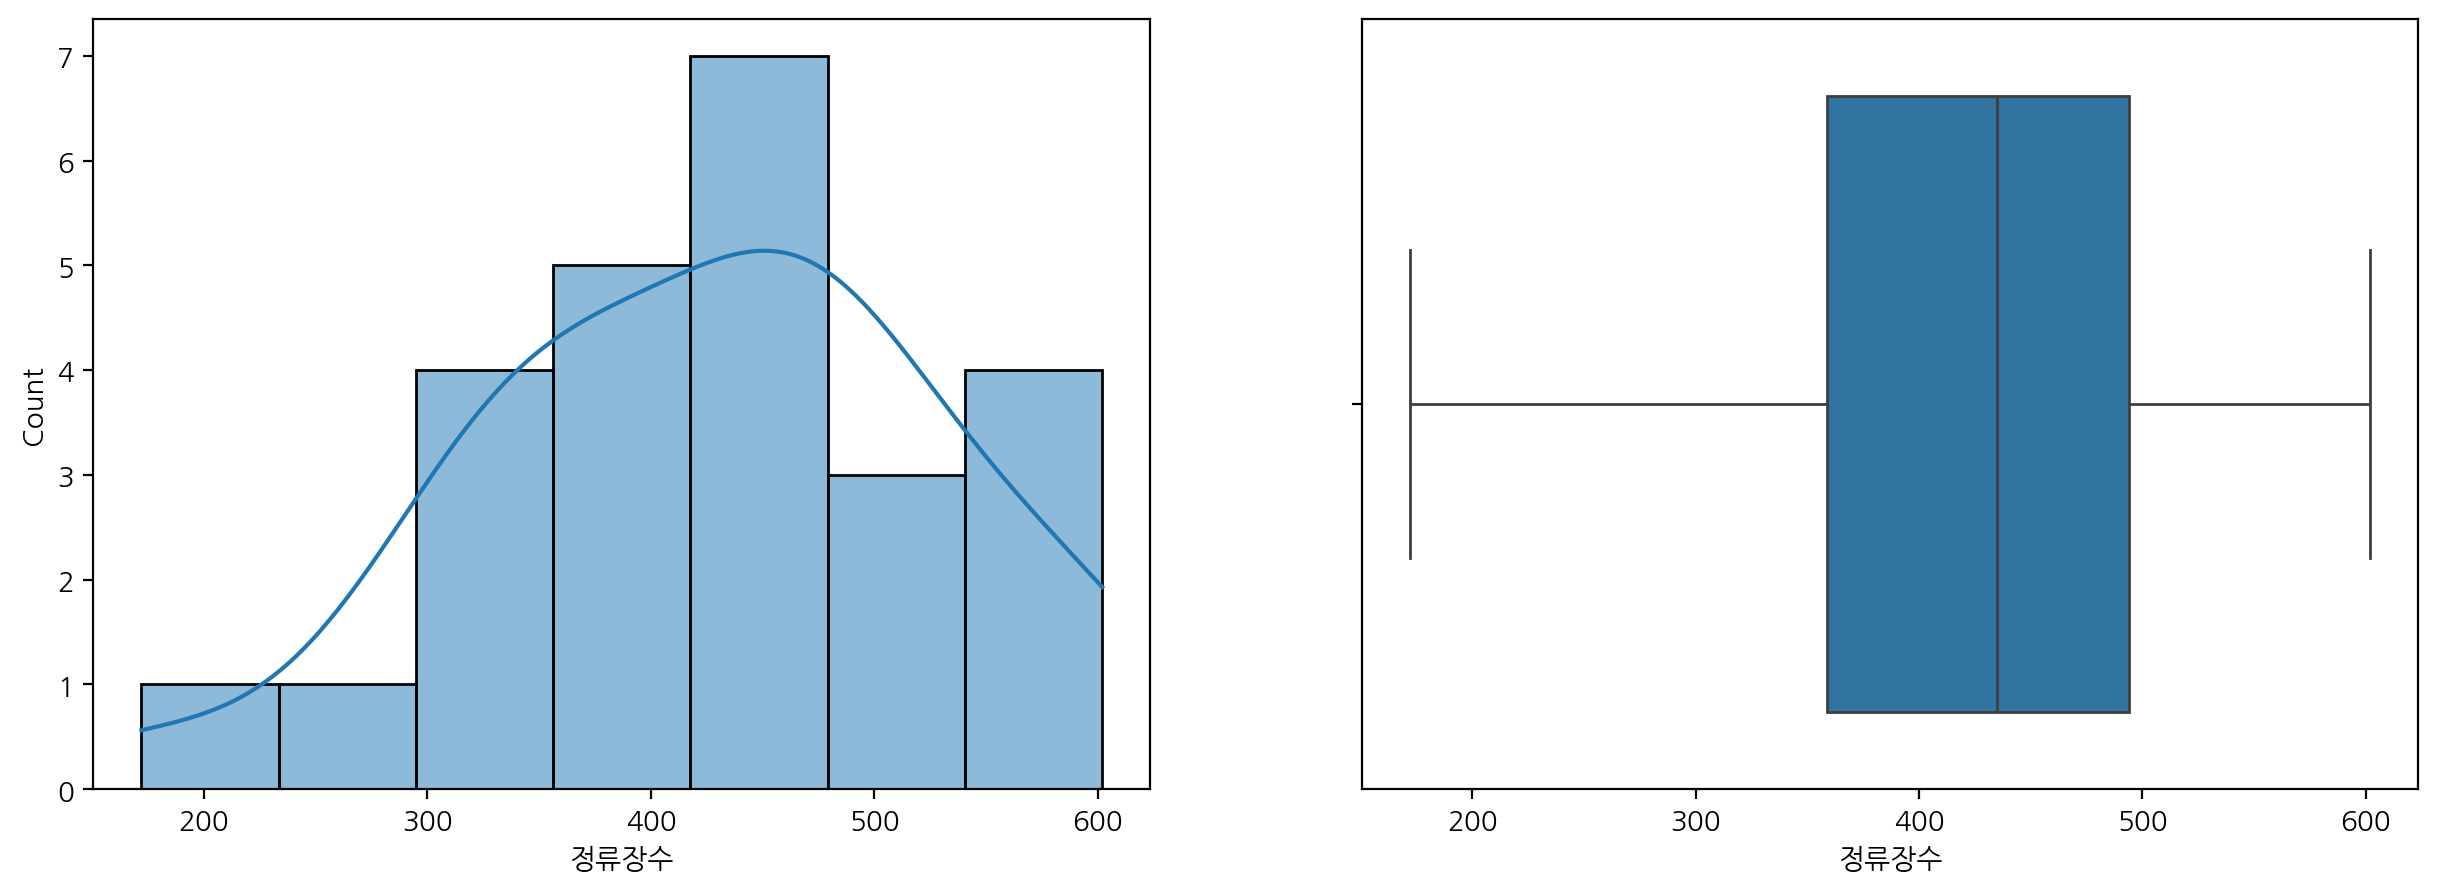

In [99]:
# 주석
# 1. 정류장 단변량 분석
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=df['정류장수'],kde=True,bins=7)

plt.subplot(1,2,2)
sns.boxplot(x=df['정류장수'])
plt.show()
# 의견: 구별 정류장의 수는 300~500개 사이인 경우가 대부분이다.

### 2)

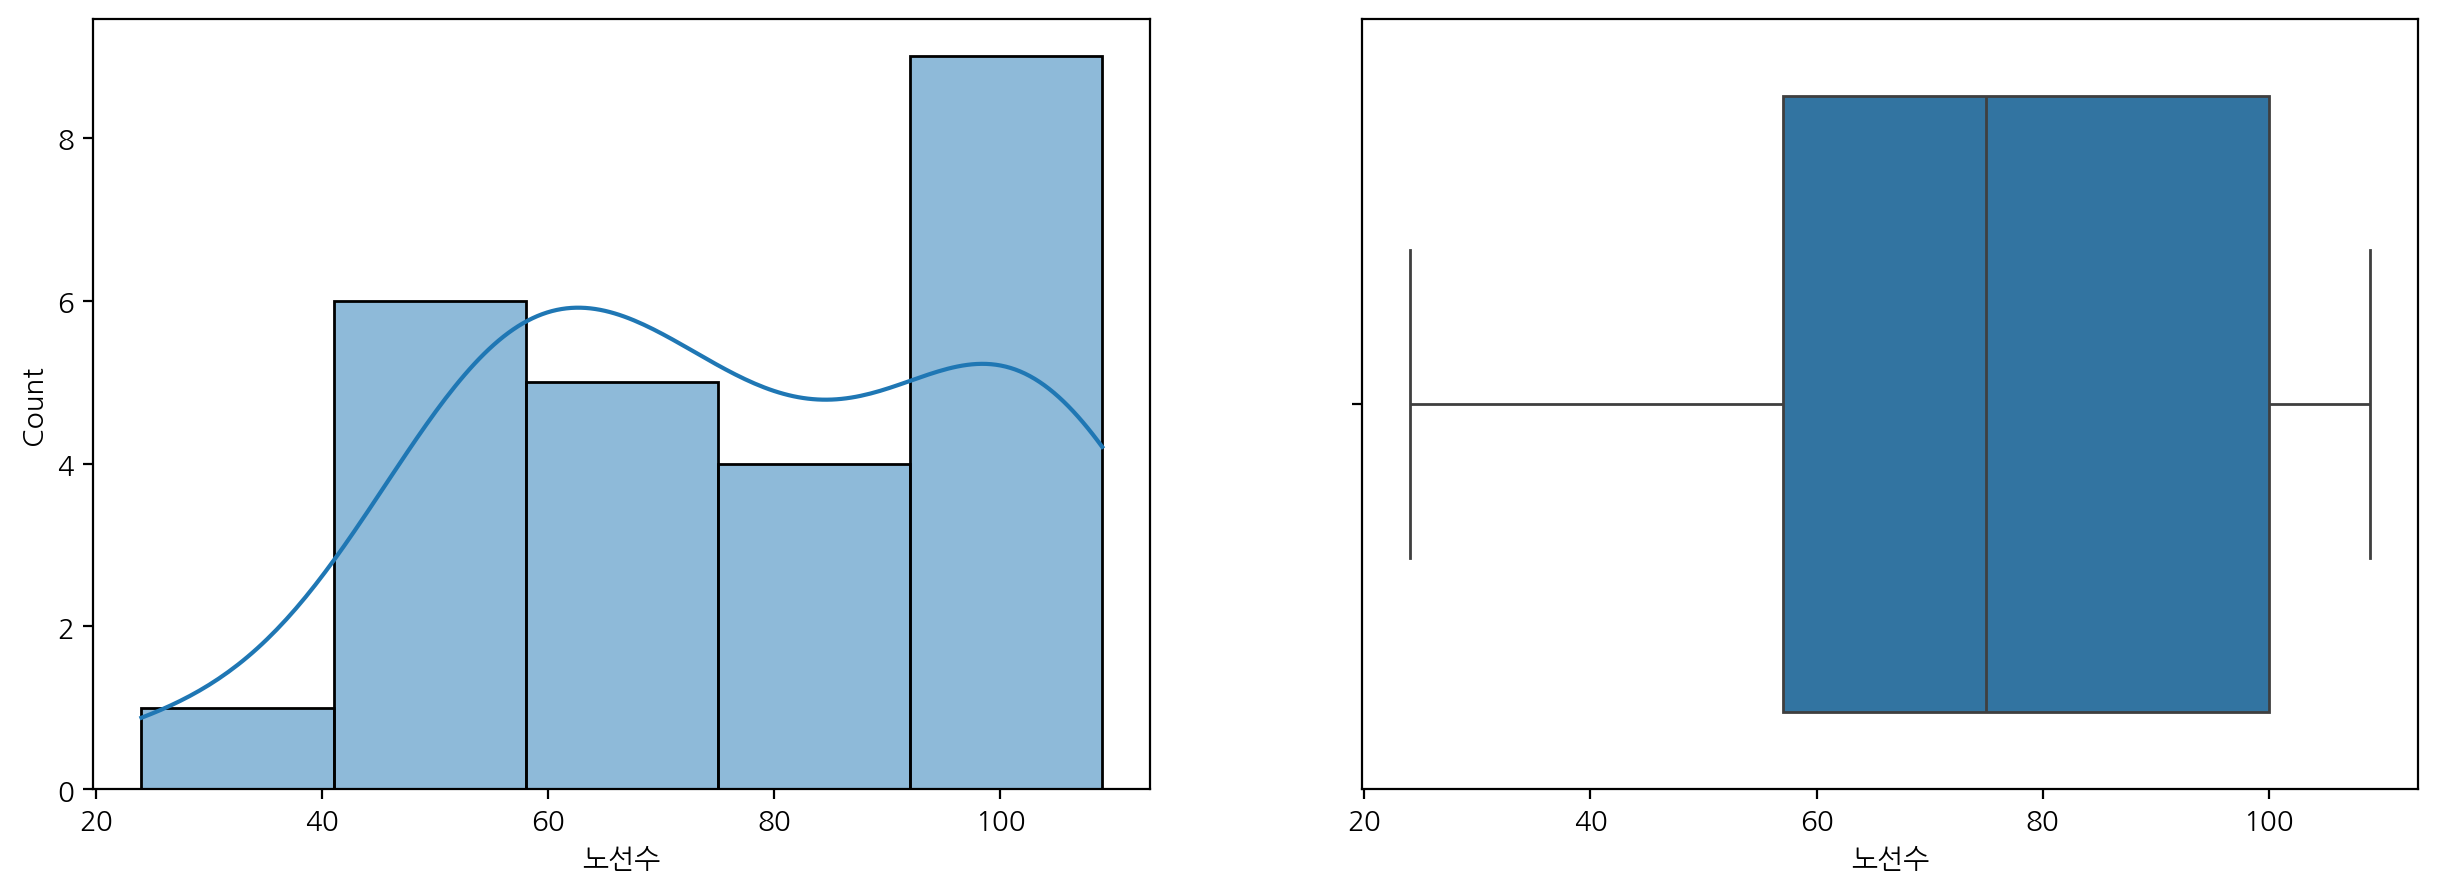

In [105]:
## 주석
# 2. 노선수 단변량 분석
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=df['노선수'],kde=True,bins=5)

plt.subplot(1,2,2)
sns.boxplot(x=df['노선수'])
plt.show()
# 의견: 구별 노선의 수는 40~100개 사이인 경우가 대부분이다.

### 3)

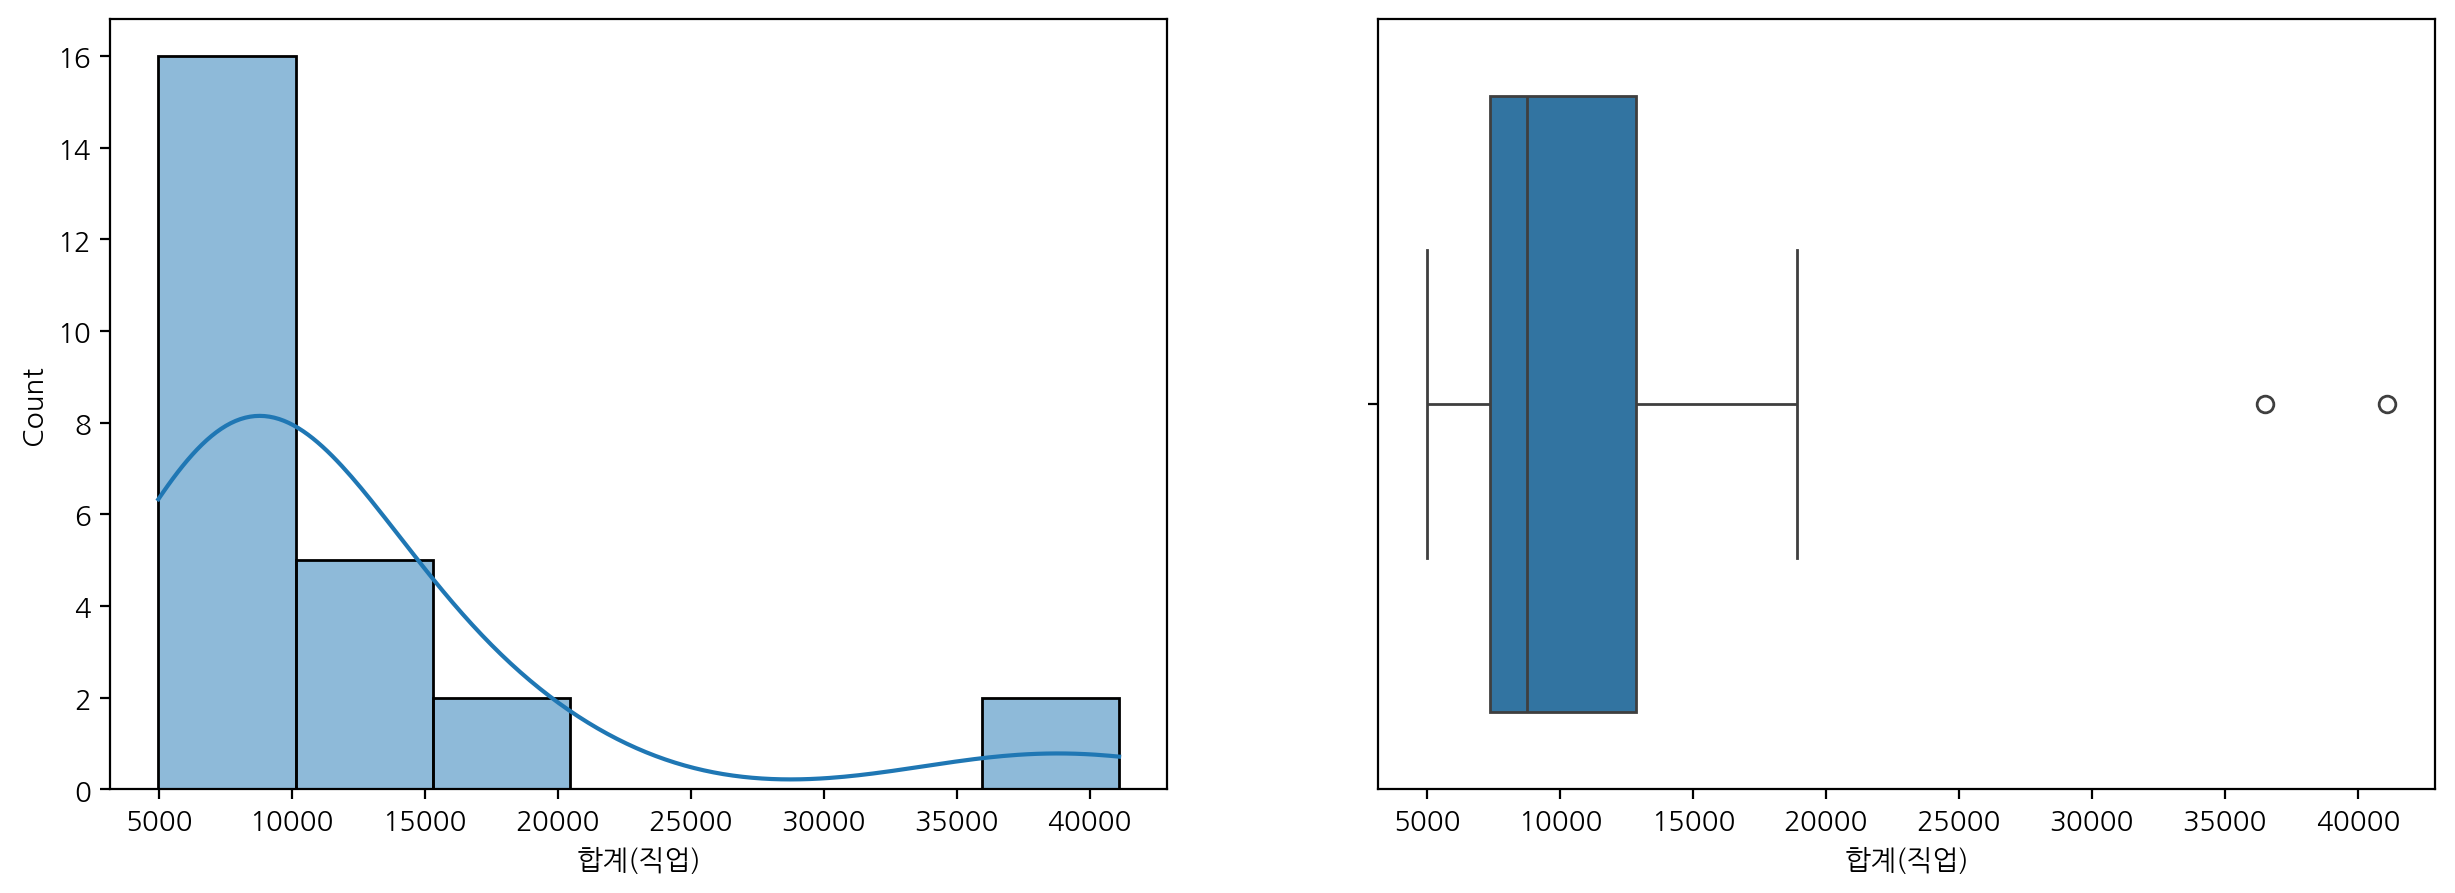

In [107]:
# 주석
# 합계(직업) 단변량 분석  # 합계(직업)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=df['합계(직업)'],kde=True,bins=7)

plt.subplot(1,2,2)
sns.boxplot(x=df['합계(직업)'])
plt.show()
# 의견: 대중교통 수요가 많을 것으로 예상되는 직업의 합은 대부분 5000~13000명 사이인것으로 나타나나 35000~40000명 사이 이상치가 존재하는 것으로 나타났다.

# 3-1)

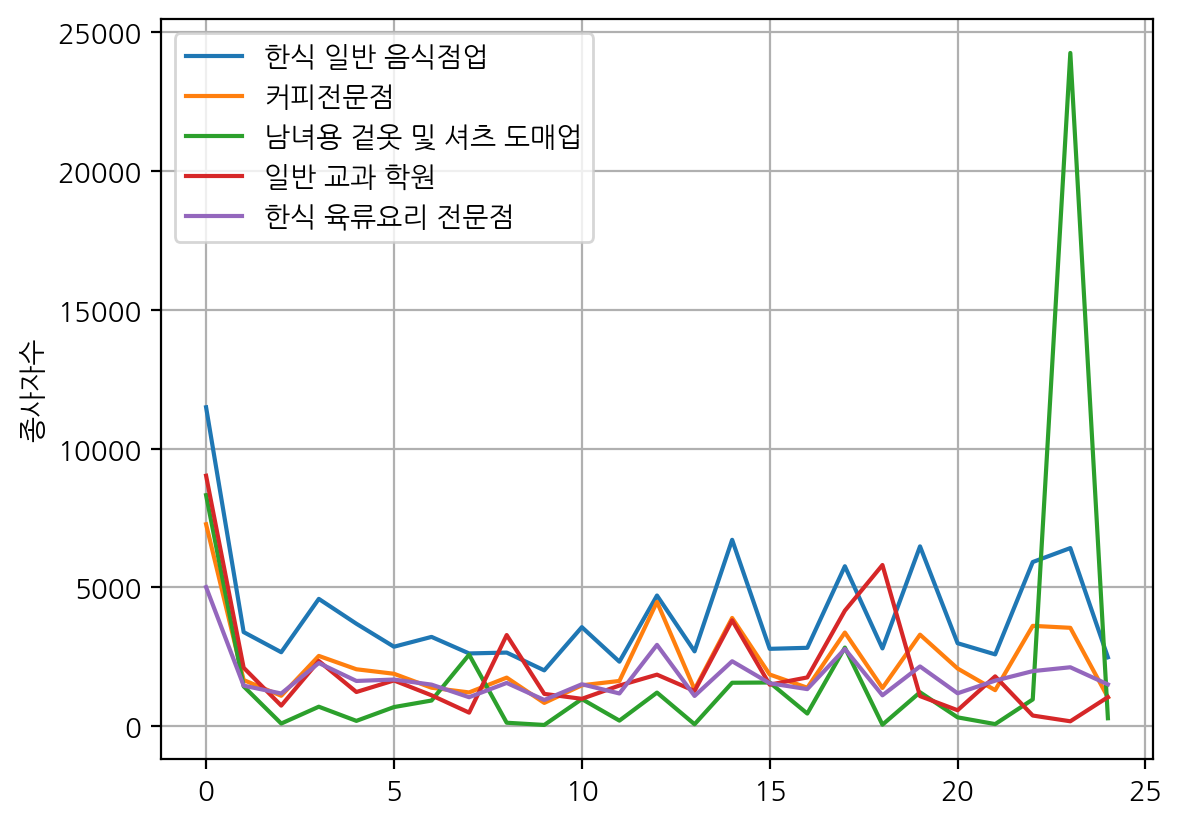

In [118]:
#구별 한식 일반 음식점업, 커피전문점, 남녀용 겉옷 및 셔츠 도매업, 일반 교과 학원, 한식 육류요리 전문점  종사자수 비교

plt.plot(df['한식 일반 음식점업'],label='한식 일반 음식점업')
plt.plot(df['커피전문점'],label='커피전문점')
plt.plot(df['남녀용 겉옷 및 셔츠 도매업'],label='남녀용 겉옷 및 셔츠 도매업')
plt.plot(df['일반 교과 학원'],label='일반 교과 학원')
plt.plot(df['한식 육류요리 전문점'],label='한식 육류요리 전문점')
plt.ylabel('종사자수')
plt.legend()
plt.grid()
plt.show()

#의견: 특정한 구에서 '남녀용 겉옷 및 셔츠 도매업' 종사자수가 특히 많은 것으로 확인 되었다. 단변량 분성 3) 에서의 이상치 또한 이에 따른 결과로 예상된다.

### 4)

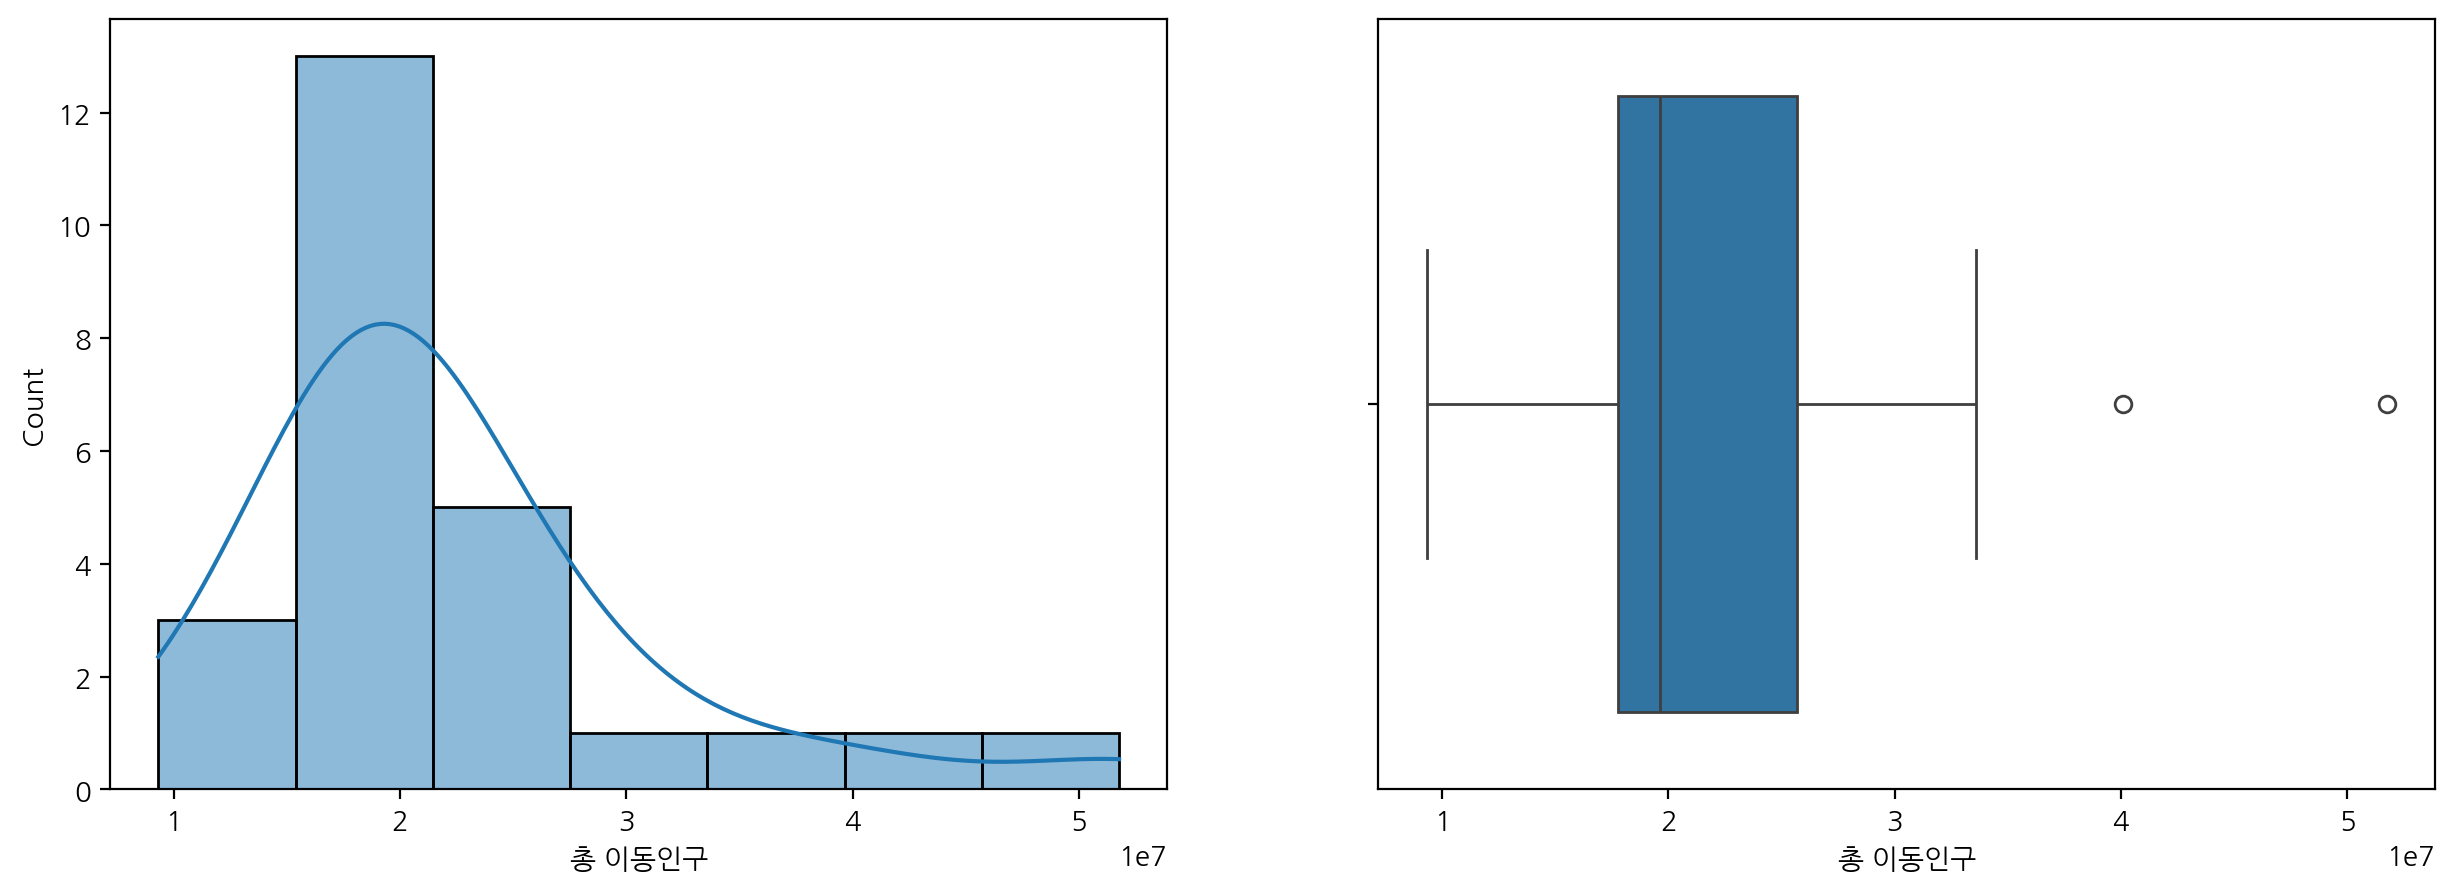

In [120]:
# 주석
# 총 이동인구 단변량 분석
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x=df['총 이동인구'],kde=True,bins=7)

plt.subplot(1,2,2)
sns.boxplot(x=df['총 이동인구'])
plt.show()

# 의견: 구별 총 이동인구수는 1000만명에서 2500만명 사이로 분포하는 것을 확인 할 수있다.

### 5)

In [5]:
# 주석


# 의견: 

# 5.이변량 분석

- 자료 종류에 맞게 $X \rightarrow Y$ 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가하세요.
- 가설 검정 시 다음 항목을 참조하여 수행하세요.
    - 유의수준: 5%
    - 숫자 → 숫자: 상관분석
    - 범주 → 범주: 카이제곱검정
    - 범주 → 숫자: t검정, 분산분석
    - 숫자 → 범주: 로지스틱 회귀모형을 통해, 회귀계수의 p-value로 검정을 수행합니다.

### 상관계수 (우리가 배운 기준)

- 0.5 ~ 1: 강한
- 0.2 ~ 0.5: 중간
- 0.1 ~ 0.2: 약간
- 0 ~ 0.1: 없음
- 음수 똑같음 

### p-value 기준: 0.05 (5%)

- p-value가 0.05보다 크다 => 귀무가설을 기각 하지 못한다 => 대립가설(우리가 원하는 바)이 틀렸다
- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함

### 1) 가설 1

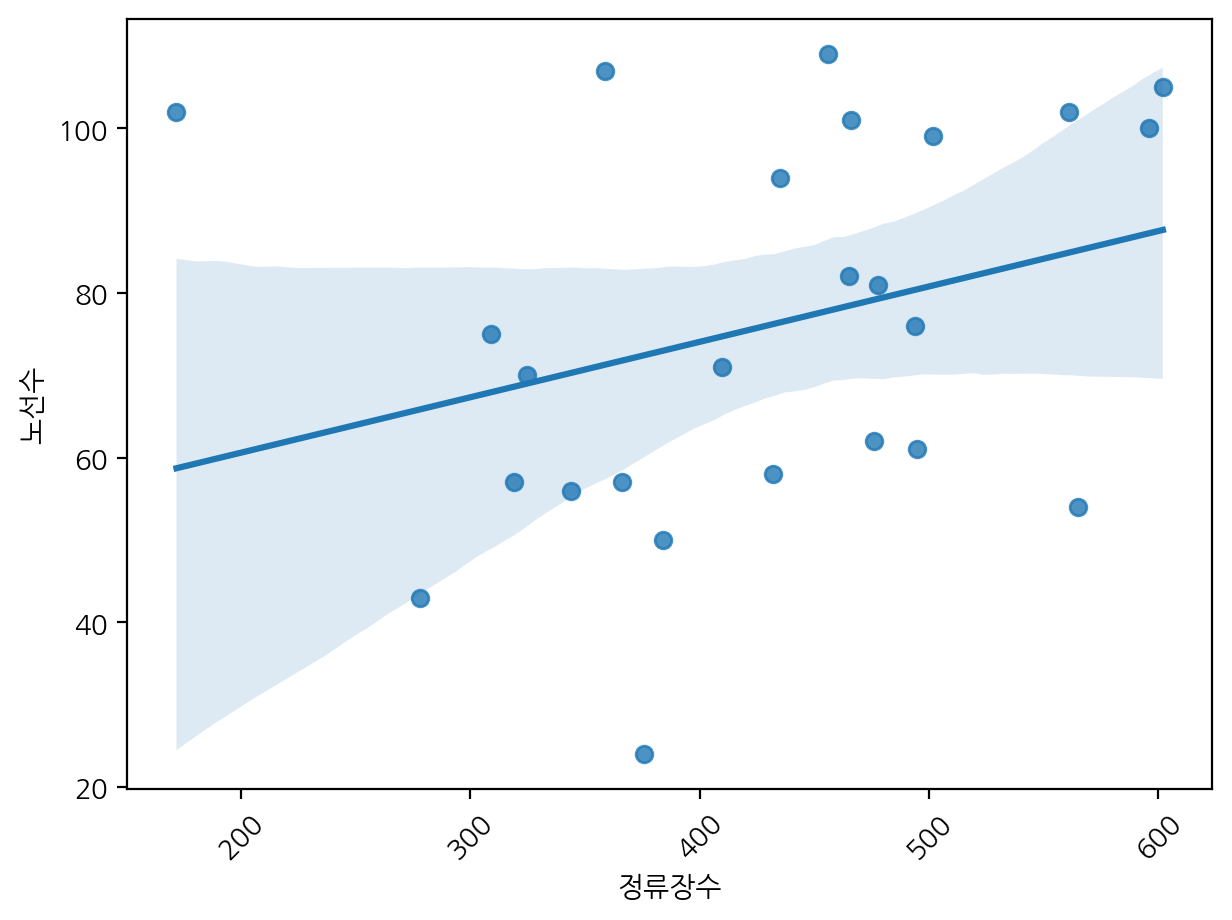

In [151]:
#가설1 연속형-연속형 데이터 scatter-plot
plt.figure(figsize=(7,5))
sns.regplot(x=df['정류장수'],y=df['노선수'])
plt.xticks(rotation=45)
plt.show()

In [144]:
# 주석 #가설1 : 자치구 별로 정류장 수가 많으면 노선수 또한 많을 것이다
cor,p_value=spst.pearsonr(df['정류장수'],df['노선수'])

print(f'상관계수 :{cor} , p-value : {p_value}')


# 의견: p-value 가 0.05 보다 높아 '가설1 : 자치구 별로 정류장 수가 많으면 노선수 또한 많을 것이다'라는 귀무가설을 기각 할 수 없다.

상관계수 :0.29996121612262033 , p-value : 0.1451676231174176


### 2) 가설 2

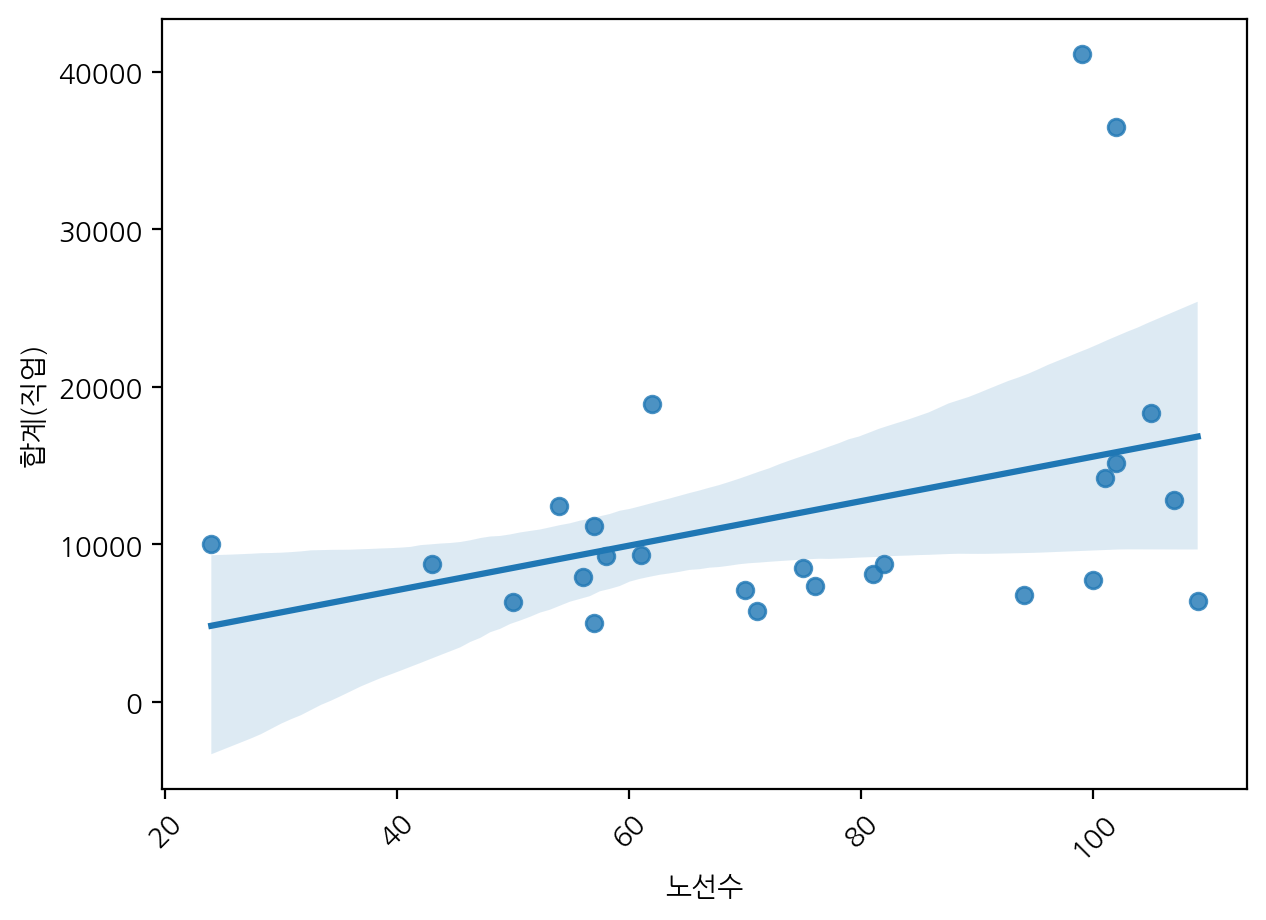

In [149]:
#가설2 연속형-연속형 데이터 scatter-plot
plt.figure(figsize=(7,5))
sns.regplot(x=df['노선수'],y=df['합계(직업)'])
plt.xticks(rotation=45)
plt.show()

In [211]:
# 주석 가설2:노선수가 많을 수록 대중교통 수요가 많은 근로자가 많을 것이다.
cor,p_value=spst.pearsonr(df['노선수'],df['합계(직업)'])

print(f'상관계수 :{cor} , p-value : {p_value}')


# 의견:  p-value 가 0.05 보다 높아 '가설2:노선수가 많을 수록 대중교통 수요가 많은 근로자가 많을 것이다.'라는 귀무가설을 기각 할 수 없다.

상관계수 :0.3753157952733933 , p-value : 0.06449383036791498


### 3) 가설 3

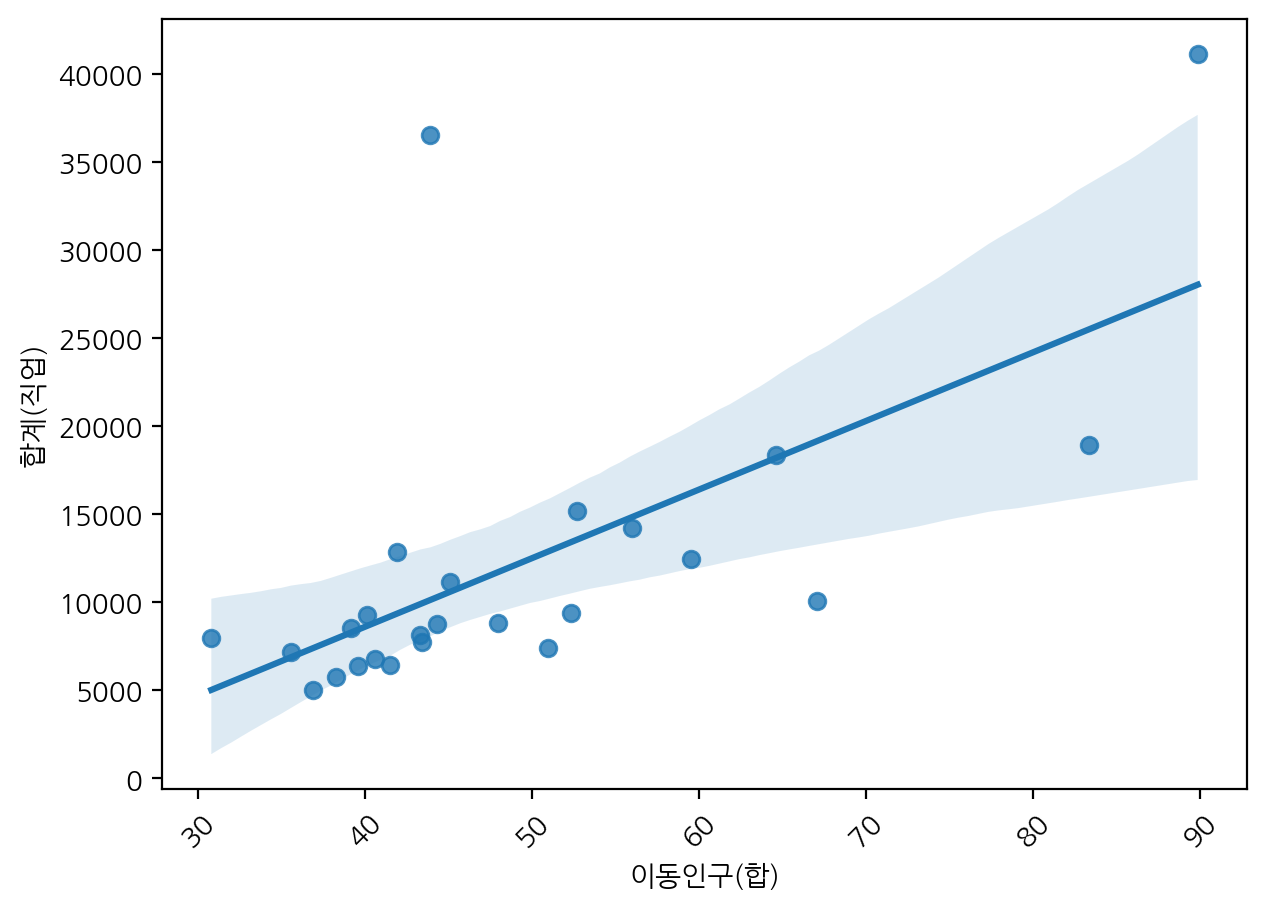

In [155]:
#가설3 연속형-연속형 데이터 scatter-plot
plt.figure(figsize=(7,5))
sns.regplot(x=df['이동인구(합)'],y=df['합계(직업)'])
plt.xticks(rotation=45)
plt.show()

In [159]:
# 주석 가설3 : 대중교통 이용 인구는 출퇴근 인구가 대부분일것이다.
cor,p_value=spst.pearsonr(df['이동인구(합)'],df['합계(직업)'])

print(f'상관계수 :{cor} , p-value : {p_value}')


# 의견:  p-value 가 0.05 보다 낮아 '가설3 : 대중교통 이용 인구는 출퇴근 인구가 대부분일것이다.' 라는 귀무가설을 기각 할 수 있다.

상관계수 :0.632718313182254 , p-value : 0.0006886123231448964


### 4) 가설 4

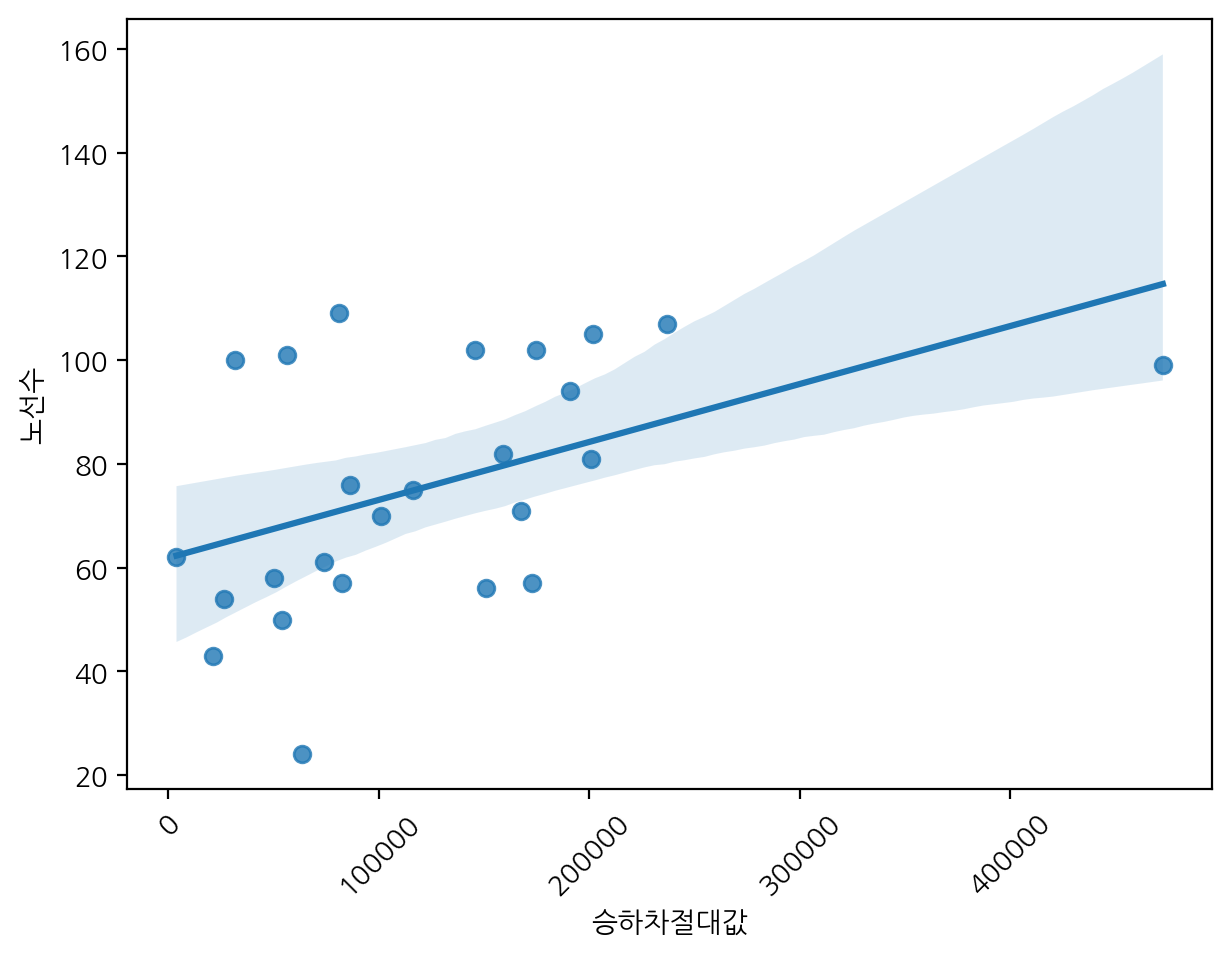

In [269]:
#가설4 연속형-연속형 데이터 
plt.figure(figsize=(7,5))
sns.regplot(x=df['승하차절대값'],y=df['노선수'])
plt.xticks(rotation=45)
plt.show()

In [271]:
# 가설4 : 승하차 승객수 차이의 크기가가 클수록 노선수에 영향을 미칠 것이다. 
cor,p_value=spst.pearsonr(df['승하차절대값'],df['노선수'])

print(f'상관계수 :{cor} , p-value : {p_value}')
#의견 p-value 가 0.05 보다 낮아 '가설4 : 승하차 승객수 차이의 크기가 클수록 노선수에 영향을 미칠 것이다.' 라는 귀무가설을 기각 할 수 있다.

상관계수 :0.46517296316201767 , p-value : 0.019123424141063973


### 5) 가설 5

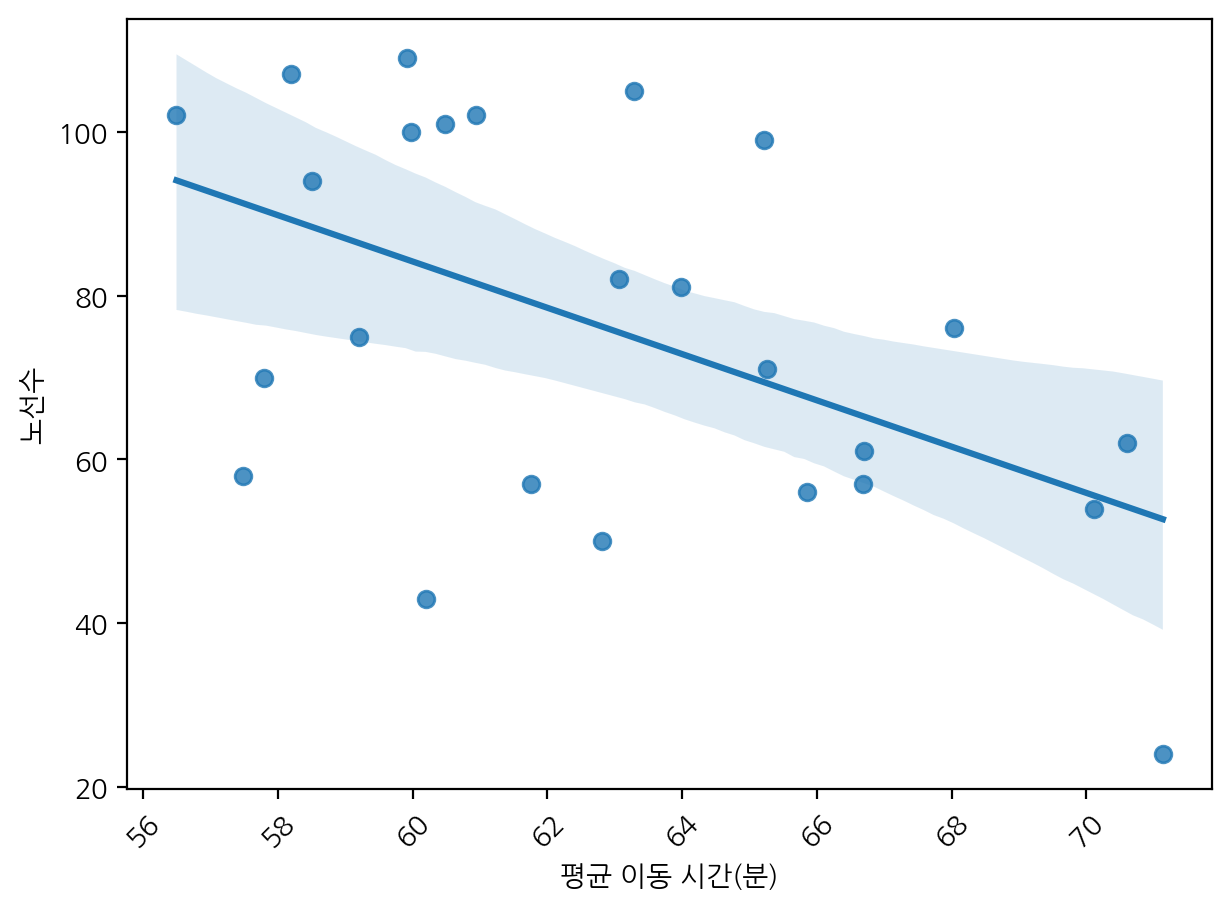

In [203]:
# 가설 5 연속형-연속형 데이터 scatter-plot
plt.figure(figsize=(7,5))
sns.regplot(x=df['평균 이동 시간(분)'],y=df['노선수'])
plt.xticks(rotation=45)
plt.show()

In [254]:
# 주석 가설 5 : 평균 이동시간이 많을 지역구 일수록 노선수가 적을 것이다.
cor,p_value=spst.pearsonr(df['평균 이동 시간(분)'],df['노선수'])

print(f'상관계수 :{cor} , p-value : {p_value}')
 

#의견 p-value 가 0.05 보다 낮아 '가설 5 : 평균 이동시간이 많은 지역구 일수록 노선수가 적을 것이다.'라는 귀무가설을 기각 할 수 있다.

상관계수 :-0.5164817726116779 , p-value : 0.008210977030339494


# 6) 가설 6

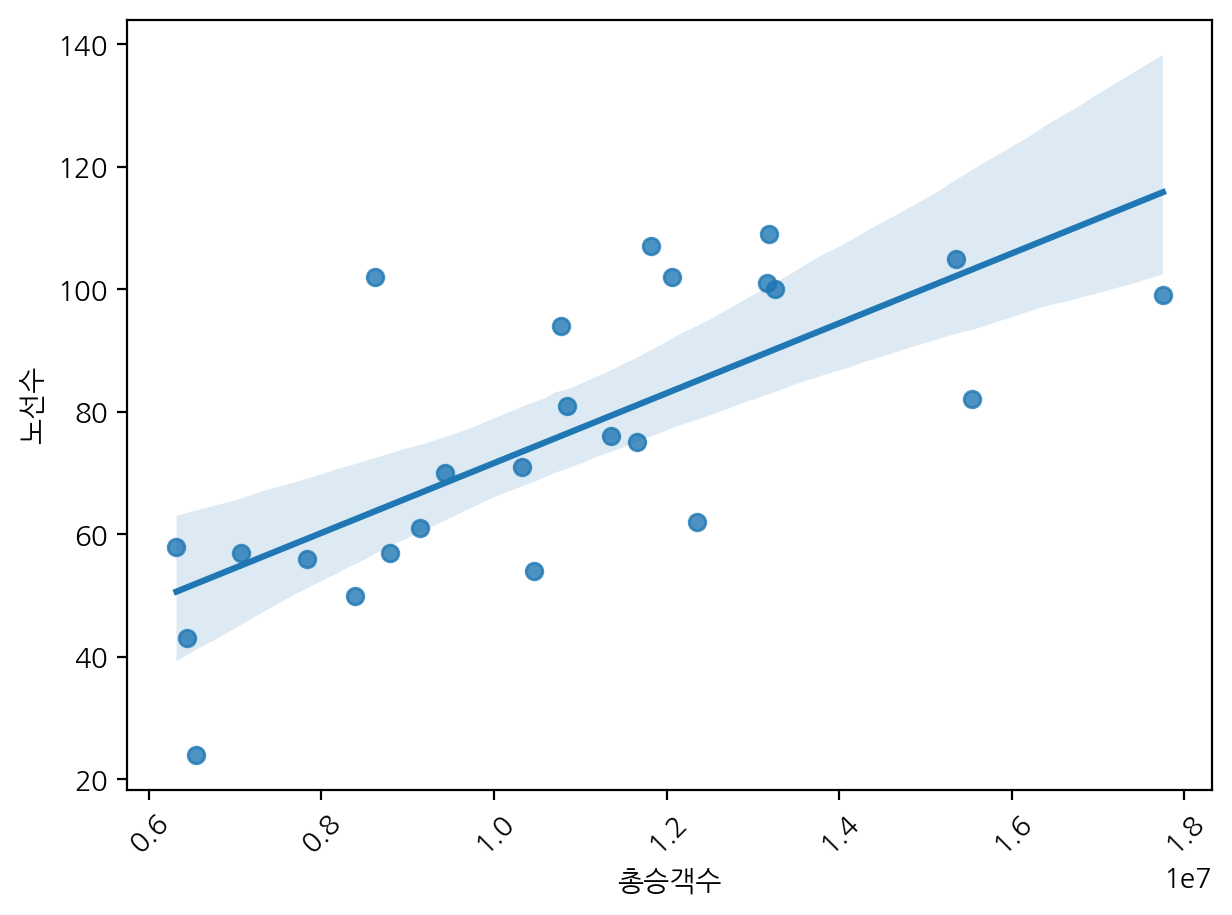

In [240]:
#가설6 연속형-연속형 데이터 scatter-plot
plt.figure(figsize=(7,5))
df['총승객수']= df['승차총승객수']+df['하차총승객수']
sns.regplot(x=df['총승객수'],y=df['노선수'])
plt.xticks(rotation=45)
plt.show()

In [242]:
# 주석 가설 6 : 총승객수가 많을 수록 노선수가 많을 것이다.
cor,p_value=spst.pearsonr(df['총승객수'],df['노선수'])

print(f'상관계수 :{cor} , p-value : {p_value}')

#의견 p-value 가 0.05 보다 낮아 '가설 6 : 총승객수가 많을 수록 노선수가 많을 것이다.'라는 귀무가설을 기각 할 수 있다.

상관계수 :0.7253742881923433 , p-value : 4.0827710664552766e-05


## 7) 가설 7

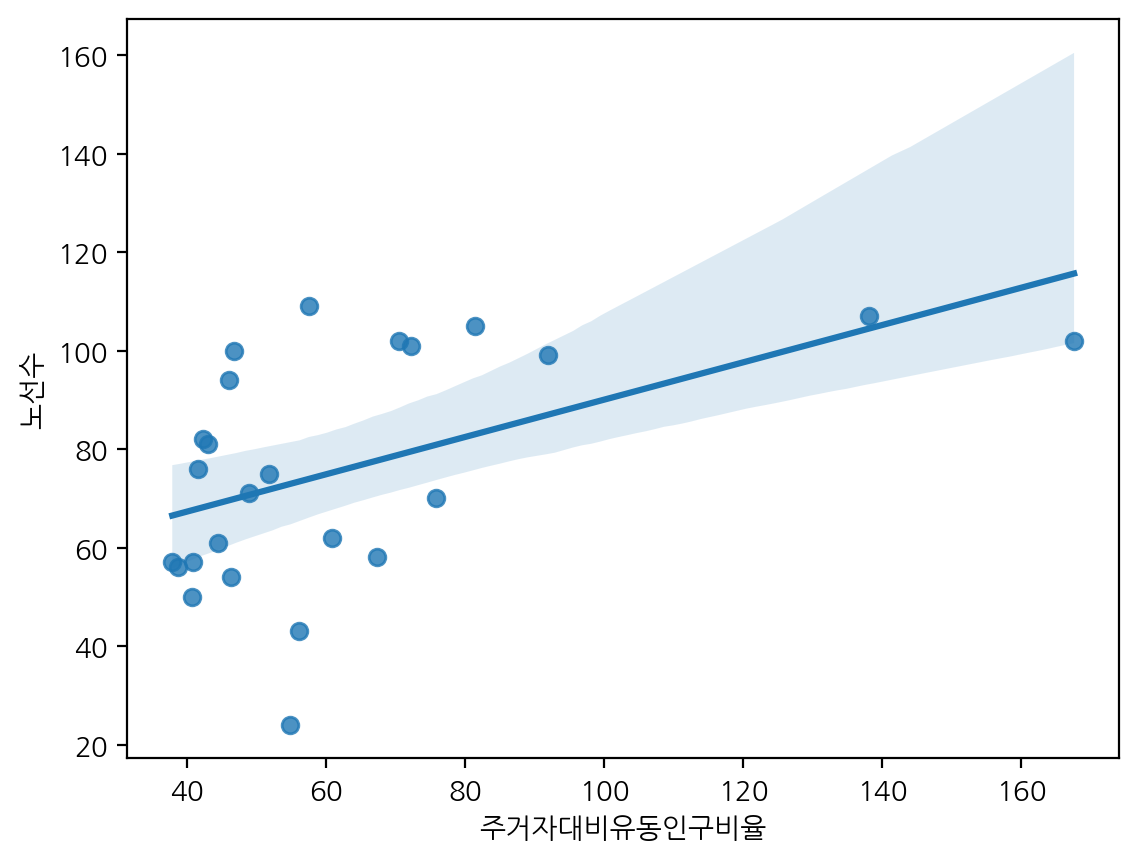

In [322]:
# [1] 주거지 대비 유동인구 비율이 높으면 상업지구, 낮으면 주거지구가 참이라 가정할 경우, '노선대비 정류장 비율이 높으면 상업지구, 낮으면 주거지구'일 것이다.
#가설7
df['주거자대비유동인구비율'] = df['총 이동인구'] / df['합계(성별)']
 
sns.regplot(x='주거자대비유동인구비율', y = '노선수', data = df)
plt.show()


In [324]:
# 주석 가설 7 : 주거자 대비 유동인구 비율의 값이 커질수록 노선수가 많아진다. 
# 이때 '주거자대비유동인구비율'이 높으면 상업지구, 낮으면 주거지구"가 참이라 가정한다.
result = spst.pearsonr(df['주거자대비유동인구비율'], df['노선수'])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')
# 중간정도의 상관관계가 있다

상관계수 : 0.5016513002860697, p-value : 0.010621171660793146


### HeatMap으로 시각화

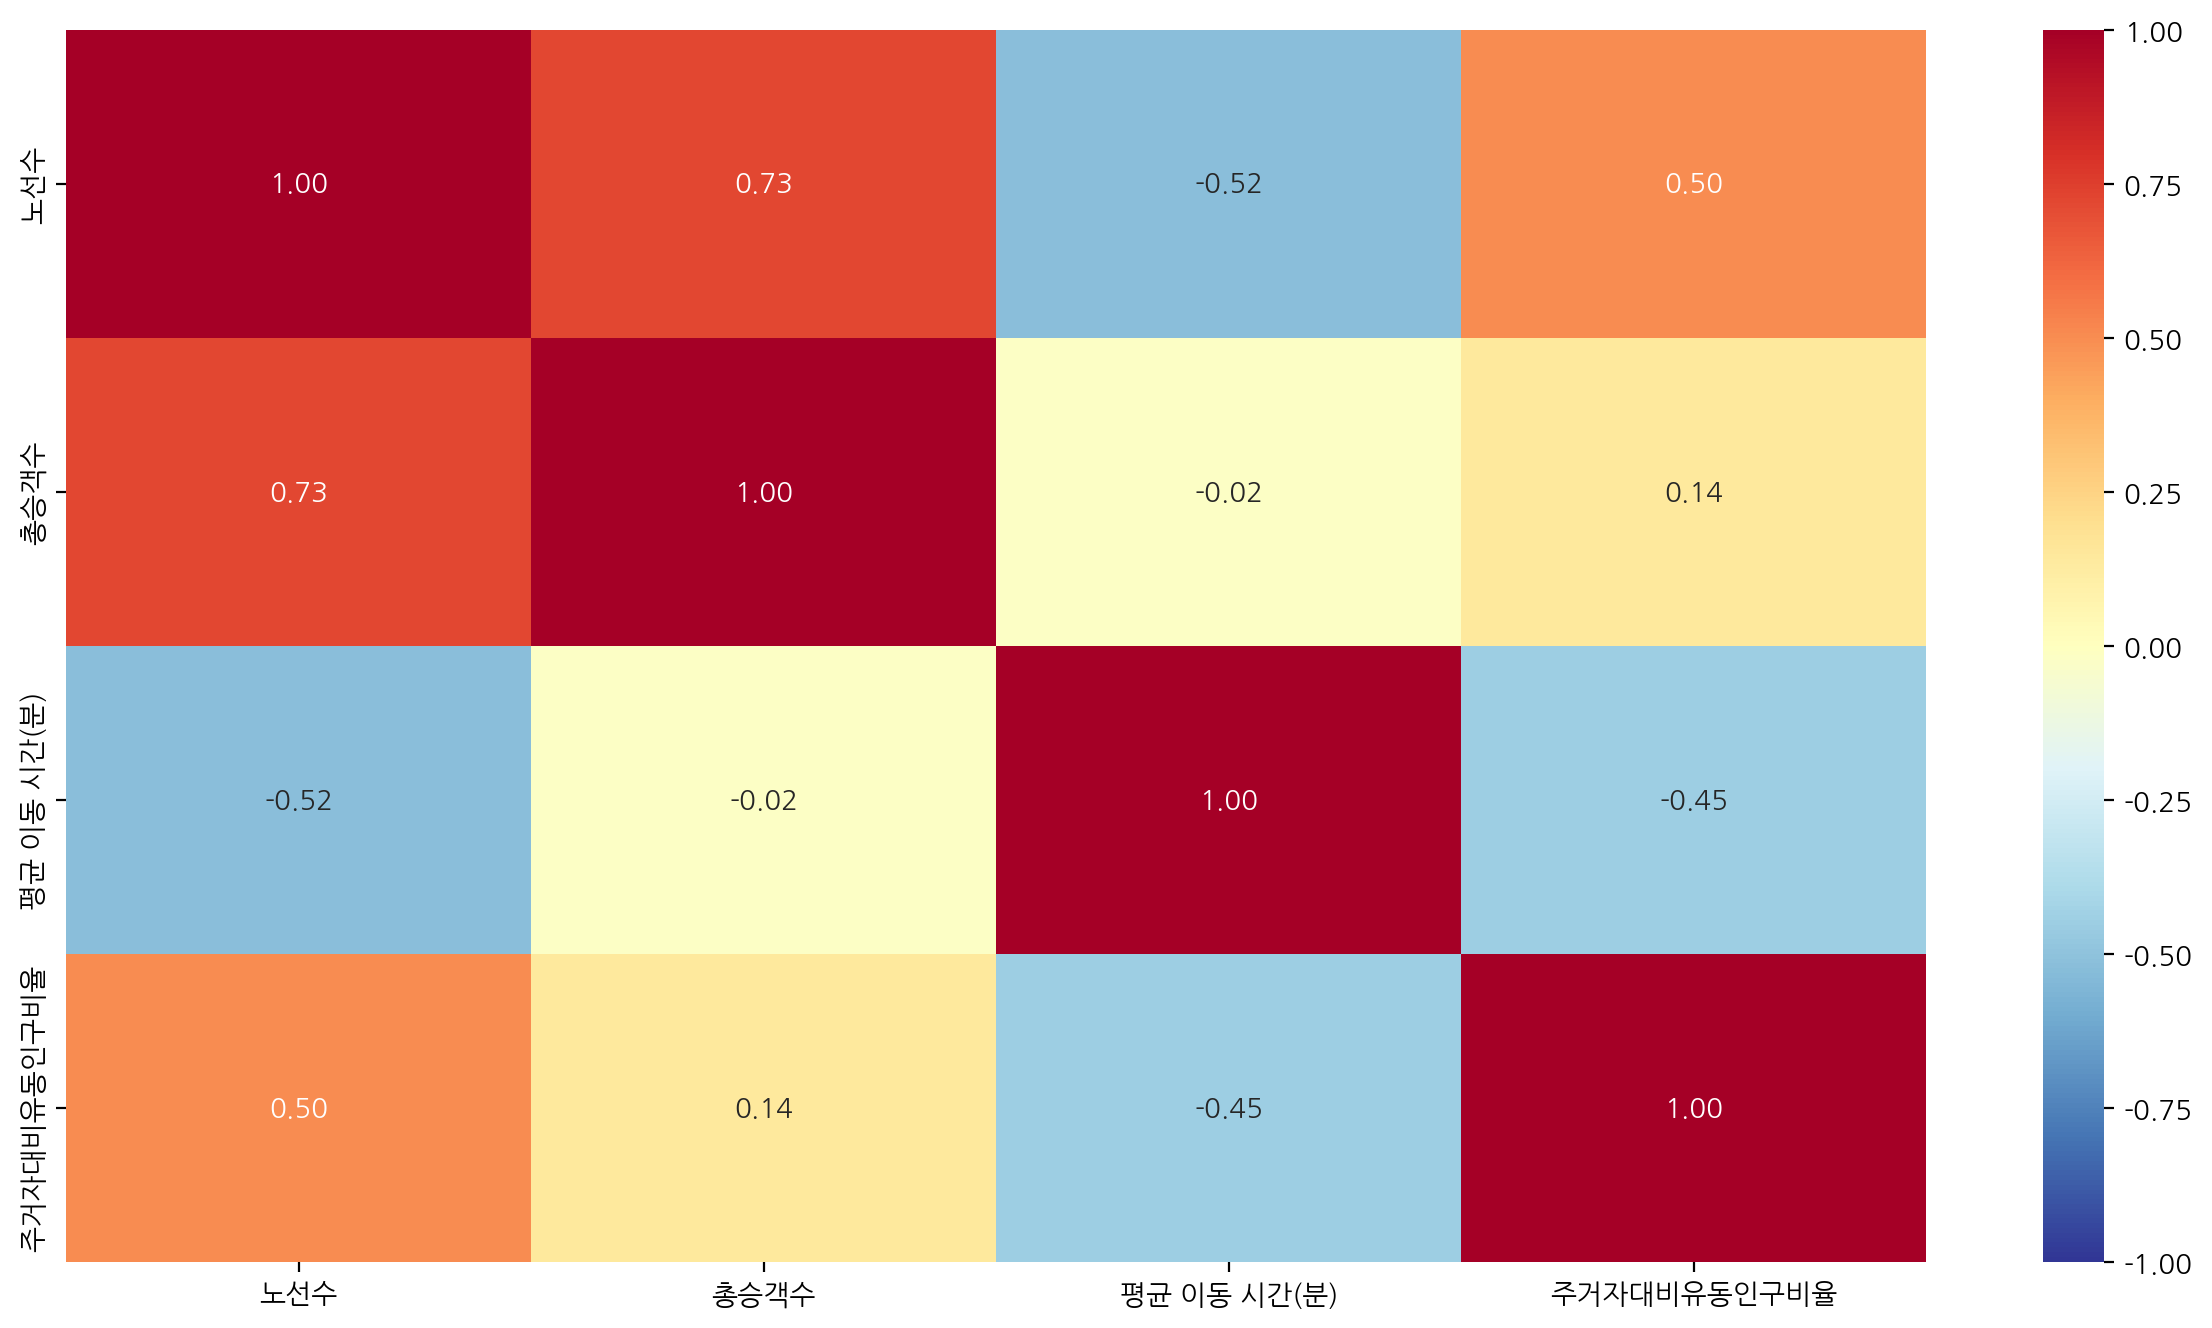

In [348]:
# 상관계수를 HeatMap으로 시각화
hdf = df.drop(labels='자치구',axis=1)
hdf = hdf[['노선수','총승객수','평균 이동 시간(분)','주거자대비유동인구비율']]

plt.figure(figsize = (15, 8))
sns.heatmap(hdf.corr(), 
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
plt.show()


# 6. 관계 정리

### 1) 강한 관계의 열

#### 1) 이동인구(합)-합계(직업)
#### 2) 평균 이동 시간(분)-노선수
#### 3) 총승객수-노선수
#### 4) 주거자 대비 유동 인구 비율-노선수


### 2) 중간 관계의 열

#### 1) 정류장수-노선수
#### 2) 노선수-합계(직업)
#### 3) 승하차절대값-노선수

# 7. 솔루션 도출

- 위에서 확인된 내용을 기초로하여 노선(또는 정류장) 추가를 제안할 자치구를 확인하세요. 

### 1) 

In [ ]:
# 주석

# 의견: 
# 평균 이동 시간(분)-노선수의 분석결과 강한관계로 연관이 있고 p-value 또한 0.05 이하이다.
# 이에 따라 평균 이동 시간(분) 이 큰데 비해 노선수가 적은 지역구에 노선 추가 제안이 가능하다.

### 2) 

In [ ]:
# 주석

# 의견:
# 총승객수(승차,하차 승객수의 합)-노선수의 분석결과 강한관계로 연관이 있고 p-value 또한 0.05 이하이다
# 이에 따라 총승객수가 많은데 비해 노선수가 적을 지역구에 노선 추가 제안이 가능하다.

### 3)

In [ ]:
# 주석

# 의견:
# 주거자 대비 유동 인구 비율-노선수의 분석결과 강한관계로 연관이 있고 p-value 또한 0.05 이하이다
# 이에 따라 주거자 대비 유동 인구 비율이 큰데 비해 노선수가 적을 지역구에 노선 추가 제안이 가능하다.

### 결론1: 어느 구에 버스 노선 또는 정류장이 제일 필요한가요?

In [338]:

df[['자치구','노선수','총승객수','평균 이동 시간(분)','주거자대비유동인구비율']]




,자치구,노선수,총승객수,평균 이동 시간(분),주거자대비유동인구비율
0,강남구,99,17753374,65.220874,91.987195
1,강동구,24,6549489,71.135695,54.850139
2,강북구,71,10321477,65.258796,48.996535
3,강서구,54,10462616,70.107829,46.303467
4,관악구,82,15541497,63.064536,42.287764
5,광진구,43,6436479,60.205262,56.199958
6,구로구,81,10850212,63.983186,43.003745
7,금천구,56,7829360,65.848807,38.797144
8,노원구,61,9145087,66.705984,44.572351
9,도봉구,57,7068773,66.683308,40.850075


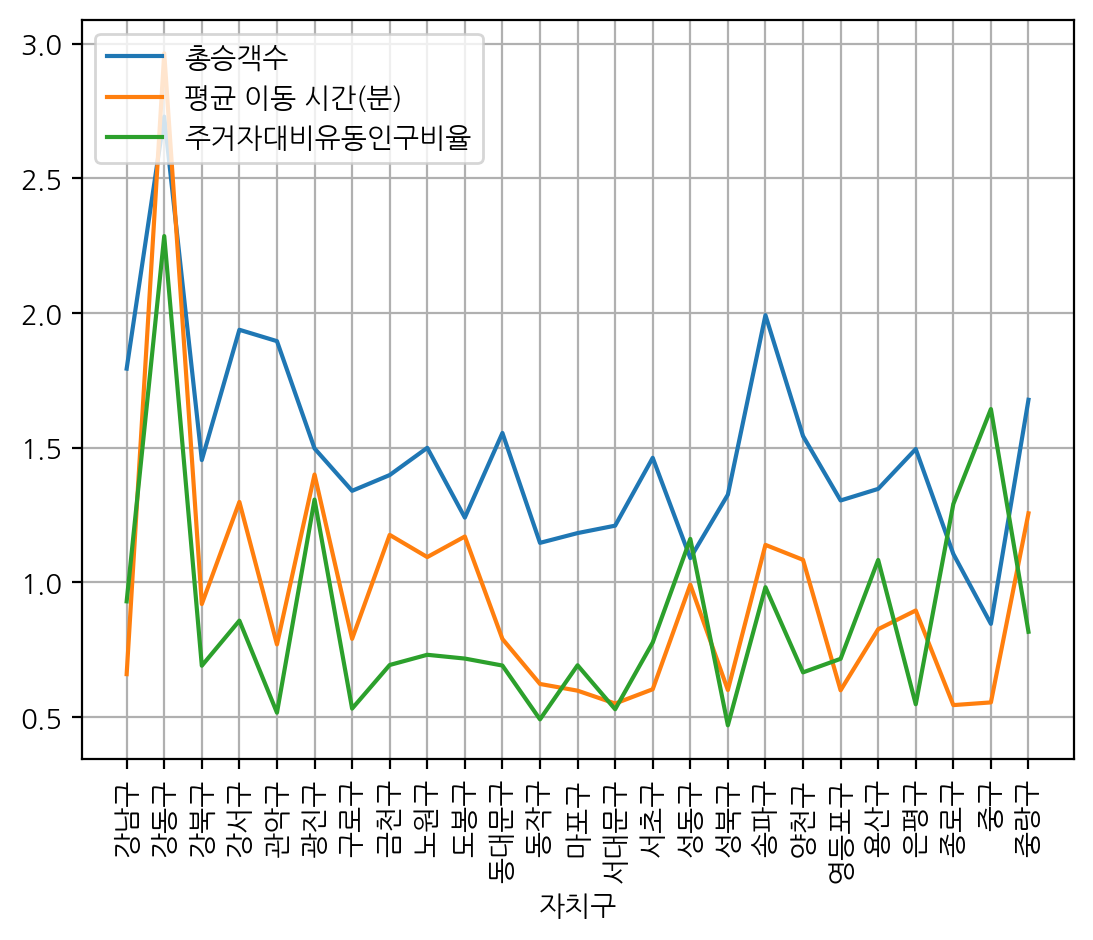

In [344]:
df[['자치구','노선수','총승객수','평균 이동 시간(분)','주거자대비유동인구비율']]
 
plt.plot(df['자치구'], df['총승객수']/df['노선수']/100000, label='총승객수')
plt.plot(df['자치구'], df['평균 이동 시간(분)']/df['노선수'], label='평균 이동 시간(분)')
plt.plot(df['자치구'], df['주거자대비유동인구비율']/df['노선수'], label='주거자대비유동인구비율')
 
plt.xticks(rotation=90)
plt.xlabel('자치구')
plt.legend(loc = 'upper left')
plt.grid()
 
plt.show()

In [ ]:

#결론1 : 강동구,광진구,성동구에 노선이 추가로 필요할 것으로 보인다.
#        또한 총승객수 대비 노선수가 적은 강서구, 송파구 주거자대비유동인구비율 대비 노선수가 적은 중구 또한 노선 추가를 고려해볼만한것으로 보인다.

### 결론2: 그 이유는 무엇인가요?

In [ ]:
#결론 2 : 7. 솔루션 도출에서 서술했듯이 평균 이동 시간, 총승객수와 노선수가 큰값의 양의 상관관계를 가지므로 
#         평균 이동 시간, 총승객수 대비 노선수가 적은 지역구인 강동구, 광진구, 성동구에 추가 노선이 필요할 것으로 결론지었다.

